**Globant DS test**

In [52]:
# Santiago Basto
# CC. 1020805283
# Data Science - Acamica
# Estudiante Economía - PUJ

# Se selecciona el ejercicio 3 del archivo "DS - tests"

In [53]:
# 3. Diabetes

# In this dataset you have 3 different outputs:
# 1. No readmission;
# 2. A readmission in less than 30 days (this situation is not good, 
#    because maybe your treatment was not appropriate);
# 3. A readmission in more than 30 days (this one is not so good as well the last one, 
#    however, the reason could be the state of the patient)

# Your task is either to classify a patient-hospital outcome 
# or to cluster them aiming at finding patterns that give a distinct insight.

# To do so, we suggest you create a notebook, like Jupyter (if you use python) 
# or a Rmarkdown report (in case you use R) and make it available for us, i.e. github.

# Hint to success in your quest: Develop and stay clear of the data science process you'll perform over the dataset 
# and highlight important aspects you might consider affordable to discuss over.

# You have up to a day before the technical interview to share your results of this test.

# Good luck.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Se carga el dataset
data_diabetic = pd.read_csv ("diabetic_data.csv")

**Análisis exploratorio de datos**

In [56]:
data_diabetic.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [57]:
data_diabetic.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [58]:
# Se reemplaza ? por NaN
data_diabetic = data_diabetic.replace("?", np.nan)

In [59]:
# El dataset tiene 101766 instancias y 50 columnas
data_diabetic.shape

(101766, 50)

In [60]:
# Se identifican cuales son las 50 variables
data_properati.columns

# Variables son:
# - id del paciente
# - caracteristicas fisiologícas de paciente (ej: raza, genero, edad, peso)
# - Variables de frecuencia (ej: número de procesos lab, número de madicamentos)
# - Niveles de resultados médicos

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [61]:
# Encounter ID: Unique identifier of an encounter
# Patient number: Unique identifier of a patient
# Race Values: Caucasian, Asian, African American, Hispanic, and other
# Gender Values: male, female, and unknown/invalid
# Age Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
# Weight: Weight in pounds
# Admission type: Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
# Discharge disposition: Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
# Admission source: Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
# Time in hospital: Integer number of days between admission and discharge
# Payer code : Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
# Medical specialty: Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
# Number of lab procedures: Number of lab tests performed during the encounter
# Number of procedures: Numeric Number of procedures (other than lab tests) performed during the encounter
# Number of medications: Number of distinct generic names administered during the encounter
# Number of outpatient visits: Number of outpatient visits of the patient in the year preceding the encounter
# Number of emergency visits: Number of emergency visits of the patient in the year preceding the encounter
# Number of inpatient visits: Number of inpatient visits of the patient in the year preceding the encounter
# Diagnosis 1: The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
# Diagnosis 2: Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
# Diagnosis 3: Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
# Number of diagnoses : Number of diagnoses entered to the system 0%
# Glucose serum test : result Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
# A1c test result : Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
# Change of medications : Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
# Diabetes medications : Indicates if there was any diabetic medication prescribed. Values: “yes” and “no” 24 features for medications For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
# Readmitted : Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

In [62]:
#Se identifican los valores faltantes por cada variable
data_diabetic.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [63]:
data_diabetic.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


**Feature engineering**

In [64]:
# Vemos el número de instanceas por cada posibilidad de la variable readmitted
# 54864 pacientes no reingresaron al hospital
# 35545 reingresaron después de 30 días
# 11357 reingresaron antes de cumplir 30 días después de su última consulta

pd.DataFrame(data_diabetic.groupby("readmitted").size().sort_values(ascending = False).head())

,0
readmitted,
NO,54864
>30,35545
<30,11357


In [65]:
data_diabetic['target']=(data_diabetic['readmitted']=='<30').astype('int')

In [66]:
# Ahora clasificamos la variable respuesta "readmitted" como "target"
# 0: No readmitidos (pacientes que ingresan después de 30 días o que no reingresan)
# Es decir, paciente que ingresan por un motivo no relacionado a su último ingreso al hospital
# 1: Pacientes readmitidos (pacientes que reingresan al hospital en menos de 30 días)
# Pacientes que, posiblemente, reingresan por motivos relacionado a su última consulta

pd.DataFrame(data_diabetic.groupby("target").size().sort_values(ascending = False).head())

,0
target,
0,90409
1,11357


Text(0.5, 1.0, 'Distribución variable respuesta: target')

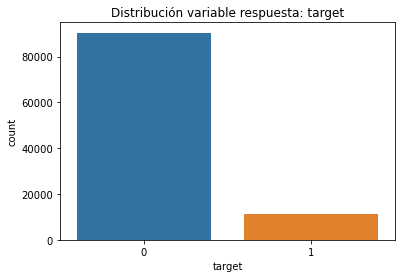

In [67]:
# La variable salida no esta balanceada
# el número de pacientes readmitidos (1) es mucho menor al de paciente no readmitidos (0)

sns.countplot(data_diabetic['target']).set_title('Distribución variable respuesta: target')

In [68]:
# 11% de los pacientes son readmitidos en un periodo menor a 30 días, para nuestro dataset 

print(sum(data_diabetic['target'].values)/len(data_diabetic['target'].values))

0.11159915885462728


**Visualización de datos**

Género y readmisión

In [69]:
# Buscamos posible relación entre algunas de las variables

# 1. Distribución de readmisión por género

data_diabetic['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [70]:
# Quitamos Unknown/Invalid
data_diabetic = data_diabetic[data_diabetic['gender']!='Unknown/Invalid']

Text(0.5, 1.0, 'Genero paciente vs. Readmisión')

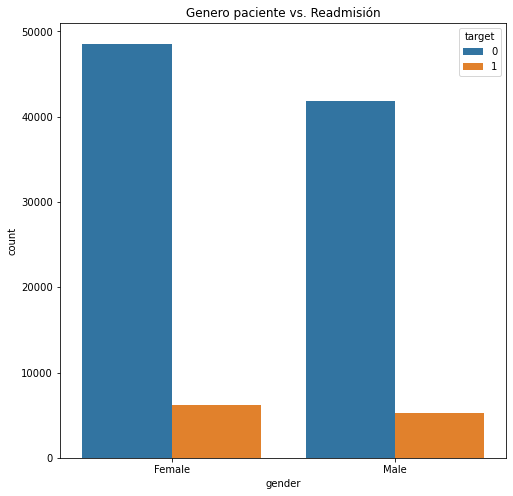

In [71]:
# Readmisión = 1
# No readmisión = 0

fig = plt.figure(figsize=(8,8))
sns.countplot(data_diabetic['gender'], hue = data_diabetic['target']).set_title("Genero paciente vs. Readmisión")

# No hay diferencia relevante en la tasa de readmisión para hombre y mujer

Edad y readmisión

In [72]:
# 2. Distribución de readmisión por edad

print(data_diabetic['age'].value_counts())
# Se deben modificar las edades

[70-80)     26066
[60-70)     22482
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64


In [73]:
age = {"age":     {"[0-10)": 0, "[10-20)": 10,"[20-30)": 20,"[30-40)": 30,"[40-50)": 40,"[50-60)": 50,
                           "[60-70)": 60,"[70-80)": 70,"[80-90)": 80,"[90-100)": 90}}

data_diabetic.replace(age_nuevo, inplace=True)

In [74]:
print(data_diabetic['age'].value_counts().sort_values())
# Edad modificada

0       161
10      691
20     1657
90     2793
30     3775
40     9685
80    17197
50    17256
60    22482
70    26066
Name: age, dtype: int64


Text(0.5, 1.0, 'Edad paciente vs. Readmisión')

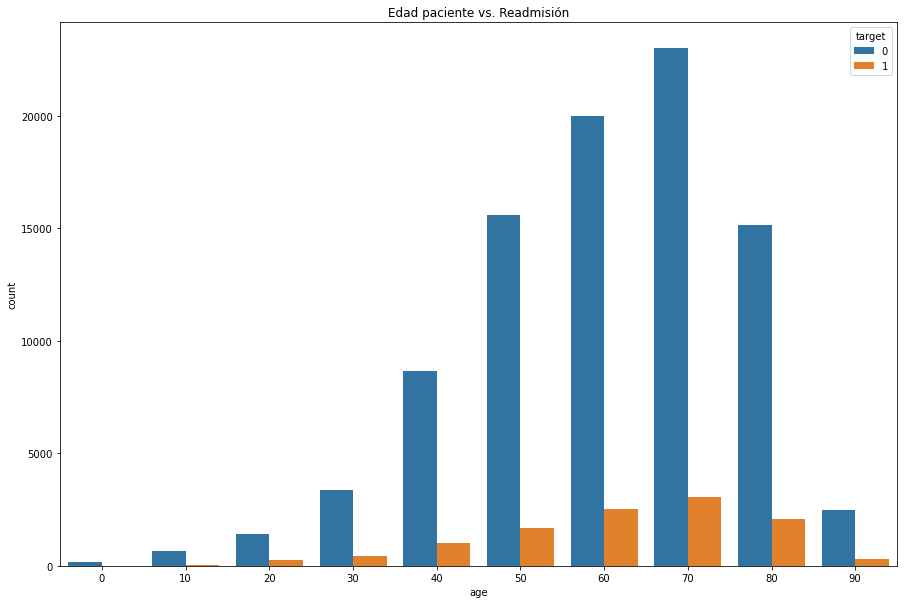

In [78]:
fig = plt.figure(figsize=(15,10))
sns.countplot(x = data_diabetic['age'], hue = data_diabetic['target']).set_title('Edad paciente vs. Readmisión')

# El mayor número de admisiones es mayor para edades entre 60 y 80, 
# pero es importante tener en cuenta que estas edades tienen el mayor número de instancias

Raza y readmisión

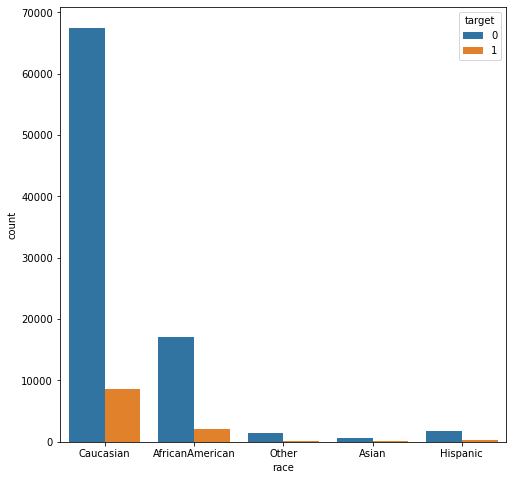

In [79]:
# 3. Distribución de readmisión por raza

fig = plt.figure(figsize=(8,8))
sns.countplot(x = data_diabetic['race'], hue = data_diabetic['target'])

# Caucasian tiene el mayor número de readmisiones

In [80]:
print(data_diabetic['race'].value_counts())

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1505
Asian                641
Name: race, dtype: int64


Tiempo en el hospital y readmisión

Text(0.5, 1.0, 'Tiempo en Hospital vs. Readmisión')

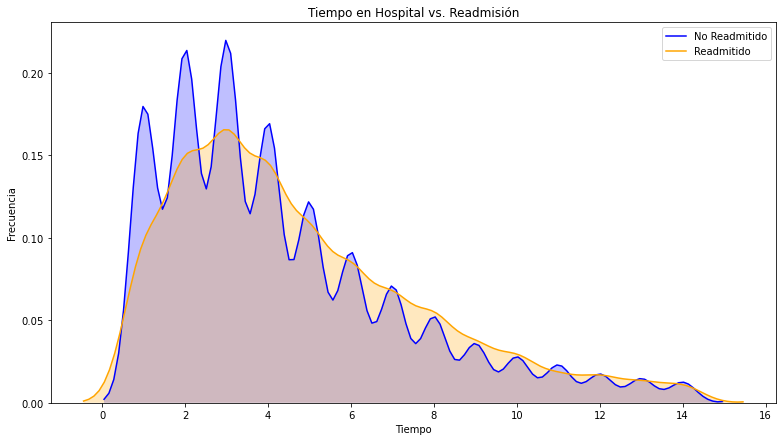

In [81]:
# Buscamos posible relación entre algunas de las variables

# 4. tiempo en el hospital vs. readmisión

fig = plt.figure(figsize=(13,7),)
ax = sns.kdeplot(data_diabetic.loc[(data_diabetic['target'] == 0),'time_in_hospital'] 
                 , color = 'b', shade = True, label = 'No Readmitido')
ax = sns.kdeplot(data_diabetic.loc[(data_diabetic['target'] == 1),'time_in_hospital'] 
                 , color = 'orange', shade = True, label = 'Readmitido')
ax.set(xlabel = 'Tiempo', ylabel = 'Frecuencia')
plt.title('Tiempo en Hospital vs. Readmisión')


# La mayoría de pacientes que pasan entre 2 y 4 días en el hospital, son readmitidos

# A medida que aumenta el número de días en el hospital menor es el reingreso
# posiblemente más días representa mayor monitoreo al paciente y esto lleve a mejores resultados de salud del mismo

Numero de medicamentos usados y readmisión

Text(0.5, 1.0, 'Numero de medicamentos usados vs. Readmisión')

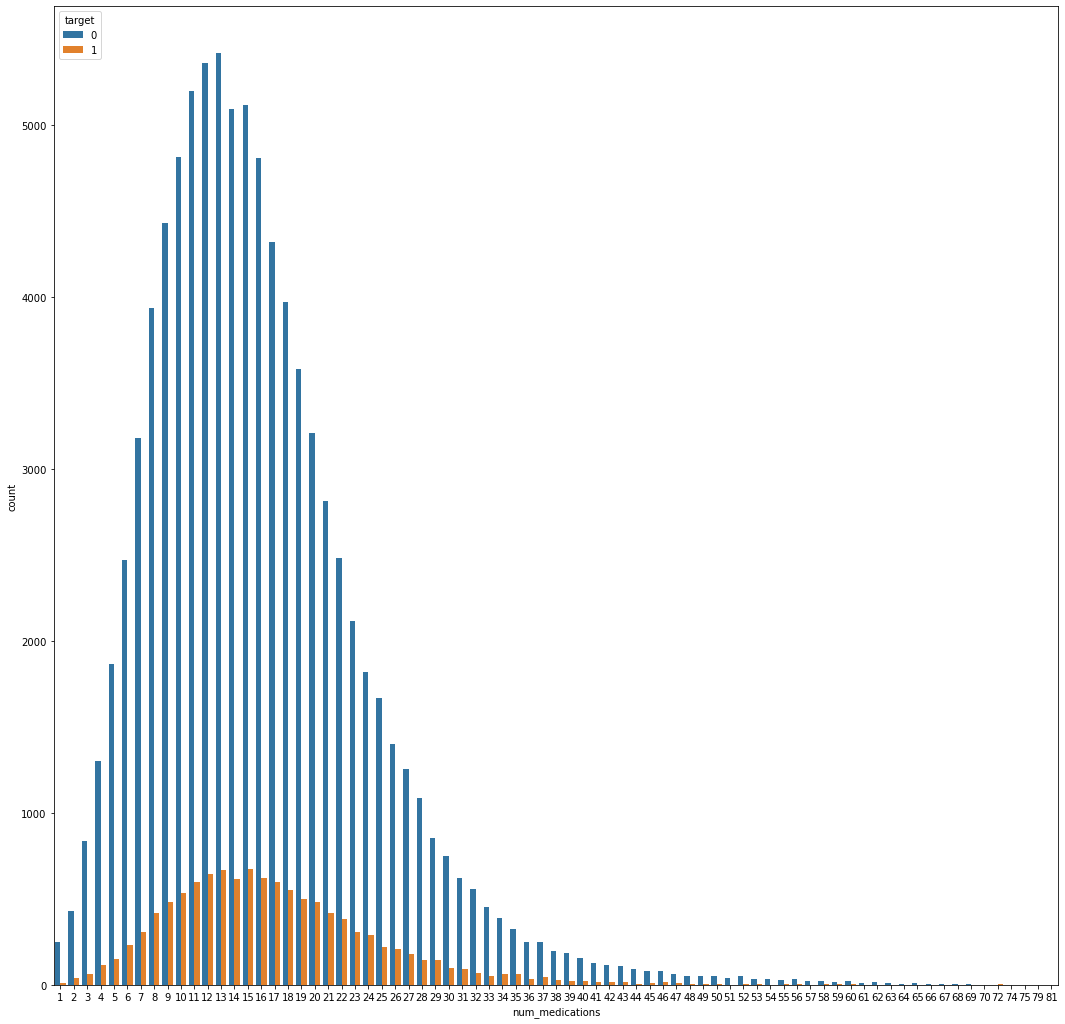

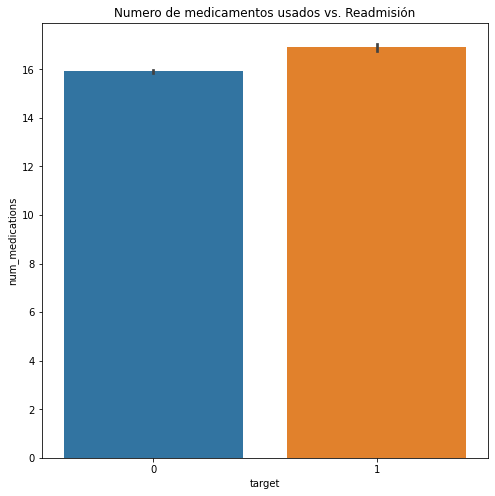

In [82]:
fig = plt.figure(figsize=(18,18))
sns.countplot(x = data_diabetic['num_medications'], hue = data_diabetic['target'])
fig = plt.figure(figsize=(8,8))

sns.barplot(x = data_diabetic['target'],
            y = data_diabetic['num_medications']).set_title("Numero de medicamentos usados vs. Readmisión")

# Numero de medicamentos como proxy de estado de salud

# Los usuarios que usan entre 10 y 16 medicamentos tienen mayor probalilidad de ser readmitidos

Uso de medicamentos de diabetes vs. Readmisión

Text(0.5, 1.0, 'Uso de medicamentos de diabetes vs. Readmisión')

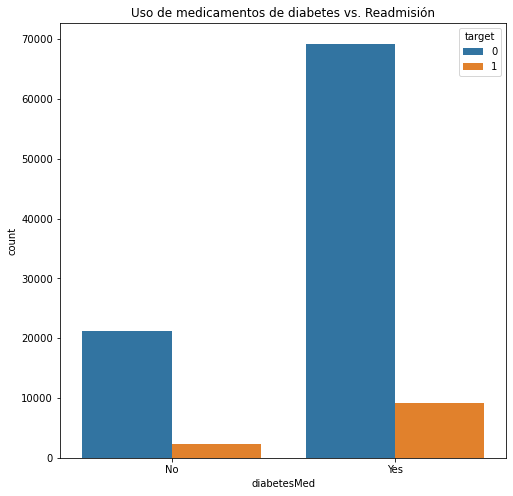

In [84]:
# 5. uso de medicamntos contra diabetes vs. readmisión

fig = plt.figure(figsize=(8,8))
sns.countplot(data_diabetic['diabetesMed'], 
              hue = data_diabetic['target']).set_title('Uso de medicamentos de diabetes vs. Readmisión')

# Pacientes que toman medicamentos contra diabetes regresan con mayor frecuencia, comparado a con los que no toman 

**Construcción Modelos**

In [90]:
data_diabetic.describe()

,encounter_id,patient_nbr,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,target,gender_Female,gender_Male,diabetesMed_No,diabetesMed_Yes
count,1.017630e+05,1.017630e+05,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,1.652008e+08,5.432965e+07,60.966854,2.024017,3.715515,5.754459,4.396018,43.095909,1.339691,16.021835,0.369368,0.197842,0.635585,7.422649,0.111602,0.537602,0.462398,0.229966,0.770034
std,1.026410e+08,3.869658e+07,15.941022,1.445414,5.279919,4.064110,2.985092,19.674220,1.705792,8.127589,1.267282,0.930485,1.262877,1.933578,0.314878,0.498587,0.498587,0.420813,0.420813
min,1.252200e+04,1.350000e+02,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.495975e+07,2.341296e+07,50.000000,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.523883e+08,4.550049e+07,60.000000,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,2.302698e+08,8.754571e+07,70.000000,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,4.438672e+08,1.895026e+08,90.000000,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
data_diabetic.head()

# Encoding para la variable gender y diabetesMed, que se consideran importantes 

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,target
0,2278392,8222157,Caucasian,Female,0,NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,10,NaN,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,64410,86047875,AfricanAmerican,Female,20,NaN,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,30,NaN,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,40,NaN,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


In [87]:
data_diabetic = pd.get_dummies(data_diabetic, columns=["gender"])

In [88]:
data_diabetic = pd.get_dummies(data_diabetic, columns=["diabetesMed"])

In [89]:
data_diabetic.head() # Con nuevas variables

,encounter_id,patient_nbr,race,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,readmitted,target,gender_Female,gender_Male,diabetesMed_No,diabetesMed_Yes
0,2278392,8222157,Caucasian,0,NaN,6,25,1,1,NaN,...,No,No,No,No,NO,0,1,0,1,0
1,149190,55629189,Caucasian,10,NaN,1,1,7,3,NaN,...,No,No,No,Ch,>30,0,1,0,0,1
2,64410,86047875,AfricanAmerican,20,NaN,1,1,7,2,NaN,...,No,No,No,No,NO,0,1,0,0,1
3,500364,82442376,Caucasian,30,NaN,1,1,7,2,NaN,...,No,No,No,Ch,NO,0,0,1,0,1
4,16680,42519267,Caucasian,40,NaN,1,1,7,1,NaN,...,No,No,No,Ch,NO,0,0,1,0,1


In [91]:
#Definir X, y
X = data_diabetic[['age', 'time_in_hospital', 'gender_Male', 'diabetesMed_Yes', 'num_lab_procedures', 
                   'num_procedures', 'num_medications']]
X.columns

Index(['age', 'time_in_hospital', 'gender_Male', 'diabetesMed_Yes',
       'num_lab_procedures', 'num_procedures', 'num_medications'],
      dtype='object')

In [92]:
y = data_diabetic['target']
y

0         0
1         0
2         0
3         0
4         0
         ..
101761    0
101762    0
101763    0
101764    0
101765    0
Name: target, Length: 101763, dtype: int64

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

from sklearn.metrics import accuracy_score

Decision Tree Classifier

In [98]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10)
dtree.fit(X_train, y_train) # Se entrena modelo
dtree_pred = dtree.predict(X_test) # Se prueba
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predict'), margins = True)

print("Accuracy: {0:.2f}".format(accuracy_score(y_test, dtree_pred)))

accuracy_dtree = accuracy_score(y_test, dtree_pred)

# Tenemos un modelo preciso, su accuracy score es de 0.84

Accuracy: 0.84


              Feature  Importance
3     diabetesMed_Yes    0.032389
2         gender_Male    0.045591
5      num_procedures    0.080947
0                 age    0.115177
1    time_in_hospital    0.123740
6     num_medications    0.244457
4  num_lab_procedures    0.357700


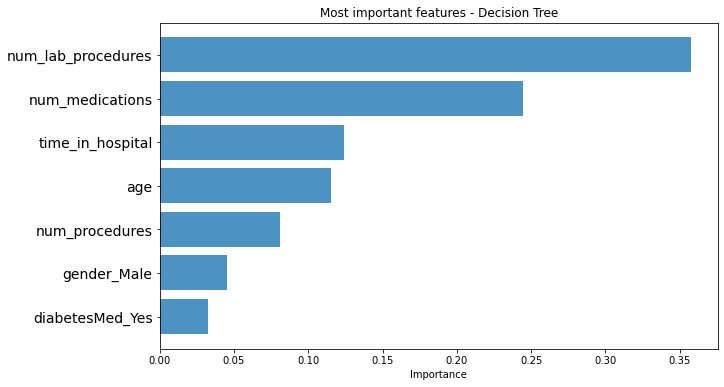

In [97]:
feature_names = X_train.columns
feature_imports = dtree.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()

Random Forest Classifier

In [99]:
from sklearn.ensemble import RandomForestClassifier

rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rm.fit(X_train, y_train)
rm_prd = rm.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(rm_prd, name = 'Predict'), margins = True)

print("Accuracy: {0:.2f}".format(accuracy_score(y_test, rm_prd)))

accuracy_rm = accuracy_score(y_test, rm_prd)

# Tenemos un modelo más preciso que el DT, su accuracy score es de 0.89
# Este es un resultado esperado, ya el el RF es un ensamble de arboles de decision
# Con este modelo logramos que distintos arboles, vean distintas porciones de datos

Accuracy: 0.89


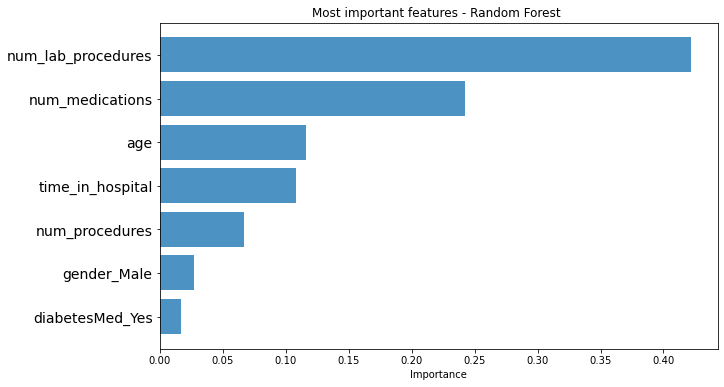

In [100]:
feature_names = X_train.columns
feature_imports = rm.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()

In [ ]:
# Insights

# - Variables fisiologicas no determinan un cambio en readmisión de los pacientes
#   Es decir, pacientes de distinto genero y/o raza puden ser reingresados a un hospital con las mismas probabilidades 
# - No hay diferencia relevante en la tasa de readmisión para hombre y mujer
# - Para la variable edad, el mayor número de admisiones es mayor para edades entre 60 y 80, 
#   pero es importante tener en cuenta que estas edades tienen también el mayor número de instancias

# - Por otro lado, las variables que pueden ser proxy de estado de salud, sí son más determinantes para ver el
#   reingreso de un paciente al hospital.
# - Los usuarios que usan entre 10 y 16 medicamentos tienen mayor probalilidad de ser readmitidos
#   Usuarios que utilizan un mayor número de medicamentos pueden tener estado de salud más sensible y por lo tanto,
#   la probabilidad de reingreso es mayor
# - Otro caso es el de pacientes que toman medicamentos contra diabetes regresan con mayor frecuencia, 
#   comparado a con los que no toman para esta enfermedad 